In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Regression Methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
import plotly.express as px
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("diabetes_Sample.csv")

In [3]:
print(df.shape)
print(df.columns)
df.head(1)

(343, 22)
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3


In [4]:
df["Diabetes"] = df["Diabetes_012"]
df = df[['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes,343.0,0.469388,0.840197,0.0,0.0,0.0,0.0,2.0
HighBP,343.0,0.580175,0.494251,0.0,0.0,1.0,1.0,1.0
HighChol,343.0,0.565598,0.496402,0.0,0.0,1.0,1.0,1.0
CholCheck,343.0,0.982507,0.131290,0.0,1.0,1.0,1.0,1.0
BMI,343.0,28.600583,5.740051,16.0,24.0,28.0,32.0,55.0
Smoker,343.0,0.527697,0.499962,0.0,0.0,1.0,1.0,1.0
Stroke,343.0,0.067055,0.250483,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,343.0,0.131195,0.338107,0.0,0.0,0.0,0.0,1.0
PhysActivity,343.0,0.597668,0.491085,0.0,0.0,1.0,1.0,1.0
Fruits,343.0,0.556851,0.497483,0.0,0.0,1.0,1.0,1.0


In [6]:
df.isna().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
for c in df.columns:
    df[c] = df[c].astype(int)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes              343 non-null    int32
 1   HighBP                343 non-null    int32
 2   HighChol              343 non-null    int32
 3   CholCheck             343 non-null    int32
 4   BMI                   343 non-null    int32
 5   Smoker                343 non-null    int32
 6   Stroke                343 non-null    int32
 7   HeartDiseaseorAttack  343 non-null    int32
 8   PhysActivity          343 non-null    int32
 9   Fruits                343 non-null    int32
 10  Veggies               343 non-null    int32
 11  HvyAlcoholConsump     343 non-null    int32
 12  AnyHealthcare         343 non-null    int32
 13  NoDocbcCost           343 non-null    int32
 14  GenHlth               343 non-null    int32
 15  MentHlth              343 non-null    int32
 16  PhysHlth

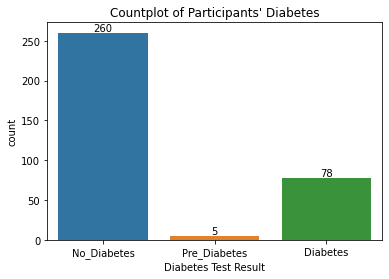

In [8]:
Q = "Diabetes Test Result"
df0 = df
df0["Diabetes Test Result"] = df["Diabetes"]
df0["Diabetes Test Result"] = df0["Diabetes Test Result"].replace({ 0 :"No_Diabetes", 1:"Pre_Diabetes", 2:"Diabetes"})

df0=df0.sort_values("Diabetes")
plt.figure(figsize = (6 , 4))
ax = sns.countplot(x=df0[Q], data = df0)
plt.title("Countplot of Participants' Diabetes")

for i in ax.containers:
    ax.bar_label(i,),

In [9]:
Q = "Diabetes Test Result"
df0 = df
df0["Diabetes Test Result"] = df["Diabetes"]
df0["Diabetes Test Result"] = df0["Diabetes Test Result"].replace({ 0 :"No_Diabetes", 1:"Pre_Diabetes", 2:"Diabetes"})

for r in df0["Diabetes Test Result"].unique():
    r_num = len(df0[df0["Diabetes Test Result"]==r])
    r_per = round(100* r_num/len(df) , 1 ) 
    print("Percent of '{}'' in dataset : {}%".format(r, r_per))


Percent of 'No_Diabetes'' in dataset : 75.8%
Percent of 'Diabetes'' in dataset : 22.7%
Percent of 'Pre_Diabetes'' in dataset : 1.5%


In [ ]:
df["Diabetes"][df["Diabetes"] == 2] = 1

Q = "Diabetes Test Result"
df0 = df
df0["Diabetes Test Result"] = df["Diabetes"]
df0["Diabetes Test Result"] = df0["Diabetes Test Result"].replace({ 0 :"No_Diabetes", 1:"Diabetes"})

for r in df0["Diabetes Test Result"].unique():
    r_num = len(df0[df0["Diabetes Test Result"]==r])
    r_per = round(100* r_num/len(df) , 1 ) 
    print("Percent of '{}'' in dataset : {}%".format(r, r_per))

### Correlation:
The correlation between parameters may result some error in methods, for instance the more correlation between columns reduces the capabilities of *Logistic Regression methods*.  

In [ ]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation of feature")

**Note**: There are some correlation between columns and this sent a message about the using Logistic Regression method.
<br>
<br>**The Correlation with Diabetes:**

In [ ]:
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12, 4)
, title="Correlation with Diabetes");
#df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False)

## Regression Models

In [ ]:
y = df["Diabetes"]
X =  df.drop(["Diabetes", "Diabetes Test Result"],axis=1)

### Spliting Dataset to Train, Cross Validation and Test

In [ ]:
X_train, X_test_cv, y_train, y_test_cv = train_test_split(X, y, test_size=0.4, random_state=42)    
X_test, X_cv, y_test, y_cv = train_test_split(X_test_cv, y_test_cv , test_size=0.5)

In [ ]:
for data in [X_train, y_train, X_test, X_cv, y_test, y_cv ]:
    print("shape : {}".format(data.shape))

### Logistic Regression

In [ ]:
Logistic = LogisticRegression(solver='newton-cg', max_iter=1000)

In [ ]:
Logistic.fit(X_train , y_train)

In [ ]:
print('Accuracy of Logistic model on Train: {:.5f}'.format(Logistic.score(X_train, y_train)))
print("Accuracy of Logistic model on Cross Validation: {0:.5f}".format(Logistic.score(X_cv, y_cv)))
print('Accuracy of Logistic model on Test: {:.5f}'.format(Logistic.score(X_test, y_test)))

**Note**: The accuaracies for Train and Cross Validation is near, Although accuracy is almost universally inappropriate for imbalanced classification.
The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class.
<br>
<br>**Precision and Recall Metrics**
<br>**Precision**
<br>Precision = TruePositive / (TruePositive + FalsePositive)
<br><br>**Recall**
<br>Recall = TruePositive / (TruePositive + FalseNegative)
<br><br>Precision and recall can be combined into a single score that seeks to balance both concerns, <br>**F-score**
<br>F-score = (2 * Precision * Recall) / (Precision + Recall)
<br>The F-score is a popular metric for imbalanced classification.

In [ ]:
# make predictions on Train set
y_train_pred = Logistic.predict(X_train)

In [ ]:
plot_confusion_matrix(Logistic,X_train,y_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

In [ ]:
# make predictions on cross validation set
y_cv_pred = Logistic.predict(X_cv)

In [ ]:
plot_confusion_matrix(Logistic,X_cv,y_cv)

In [ ]:
print(classification_report(y_cv, y_cv_pred))

In [ ]:
# make predictions on Test set
y_test_pred = Logistic.predict(X_test)

In [ ]:
plot_confusion_matrix(Logistic, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

**Conclusion for Logistic model:** <br>Here now we have a Logistic Model and accept this as the final model for this method. <br>Undoutedly there are some weak points for logistic method, the more bold of them here is: <br>*The performance of Logistic model reduces by increasing correlation between columns (what is senseable in correlation heatmap plot)*

#### Feature Importance of Logistic model

In [ ]:
importances = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': Logistic.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

fig = px.bar(importances, x="Feature", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text='importances of features obtained from Logistic model (Predicting Diabetes)')
fig.show()

In [ ]:
df.columns

In [ ]:
HighBP = int(input(print("What's your HighBP?")))

In [ ]:
HighBP

In [ ]:
HighChol = int(input(print("What's your HighChol?")))

In [ ]:
HighChol

In [ ]:
CholCheck = int(input(print("What's your CholCheck?")))

In [ ]:
CholCheck

In [ ]:
BMI = int(input(print("What's your BMI?")))

In [ ]:
BMI

In [ ]:
Smoker = int(input(print("What's your Smoker?")))

In [ ]:
Smoker

In [ ]:
Stroke = input(print("What's your Stroke?"))

In [ ]:
Stroke

In [ ]:
HeartDiseaseorAttack = input(print("What's your HeartDiseaseorAttack?"))

In [ ]:
HeartDiseaseorAttack

In [ ]:
PhysActivity = input(print("What's your PhysActivity?"))

In [ ]:
PhysActivity

In [ ]:
Fruits = input(print("What's your Fruits?"))

In [ ]:
Fruits

In [ ]:
Veggies = input(print("What's your Veggies?"))

In [ ]:
Veggies

In [ ]:
HvyAlcoholConsump = input(print("What's your HvyAlcoholConsump?"))

In [ ]:
HvyAlcoholConsump

In [ ]:
AnyHealthcare = input(print("What's your AnyHealthcare?"))

In [ ]:
AnyHealthcare

In [ ]:
NoDocbcCost = input(print("What's your NoDocbcCost?"))

In [ ]:
NoDocbcCost

In [ ]:
GenHlth = input(print("What's your GenHlth?"))

In [ ]:
GenHlth

In [ ]:
MentHlth = input(print("What's your MentHlth?"))

In [ ]:
MentHlth

In [ ]:
PhysHlth = input(print("What's your PhysHlth?"))

In [ ]:
PhysHlth

In [ ]:
DiffWalk = input(print("What's your DiffWalk?"))

In [ ]:
DiffWalk

In [ ]:
Sex = input(print("What's your Sex?"))

In [ ]:
Sex

In [ ]:
Age = input(print("What's your Age?"))

In [ ]:
Age

In [ ]:
Education = input(print("What's your Education?"))

In [ ]:
Education

In [ ]:
Income = input(print("What's your Income?"))

In [ ]:
Income

In [ ]:
Diabetes = input(print("What's your Diabetes?"))

In [ ]:
Diabetes

In [ ]:
df.columns

In [ ]:
df0 = df[df["HighBP"]==0] 
df1 = df[df["HighChol"]==1] 
df2 = df[df["CholCheck"]==2] 
df3 = df[df["BMI"]==3] 
df4 = df[df["Smoker"]==4] 
df5 = df[df["Stroke"]==5] 
df6 = df[df["HeartDiseaseorAttack"]==6] 
df7 = df[df["PhysActivity"]==7] 
df8 = df[df["Fruits"]==8] 
df9 = df[df["Veggies"]==9] 
df10 = df[df["HvyAlcoholConsump"]==10] 
df11 = df[df["AnyHealthcare"]==11] 
df12 = df[df["NoDocbcCost"]==12] 
df13 = df[df["GenHlth"]==13] 
df14 = df[df["MentHlth"]==14] 
df15 = df[df["PhysHlth"]==15] 
df16 = df[df["DiffWalk"]==16] 
df17 = df[df["Sex"]==17] 
df18 = df[df["Age"]==18] 
df19 = df[df["Education"]==19] 
df20 = df[df["Income"]==20] 
df21 = df[df["Diabetes"]==21]

len(df21)